Computing Samples: 100%|██████████████| 100000/100000 [00:17<00:00, 5832.94it/s]


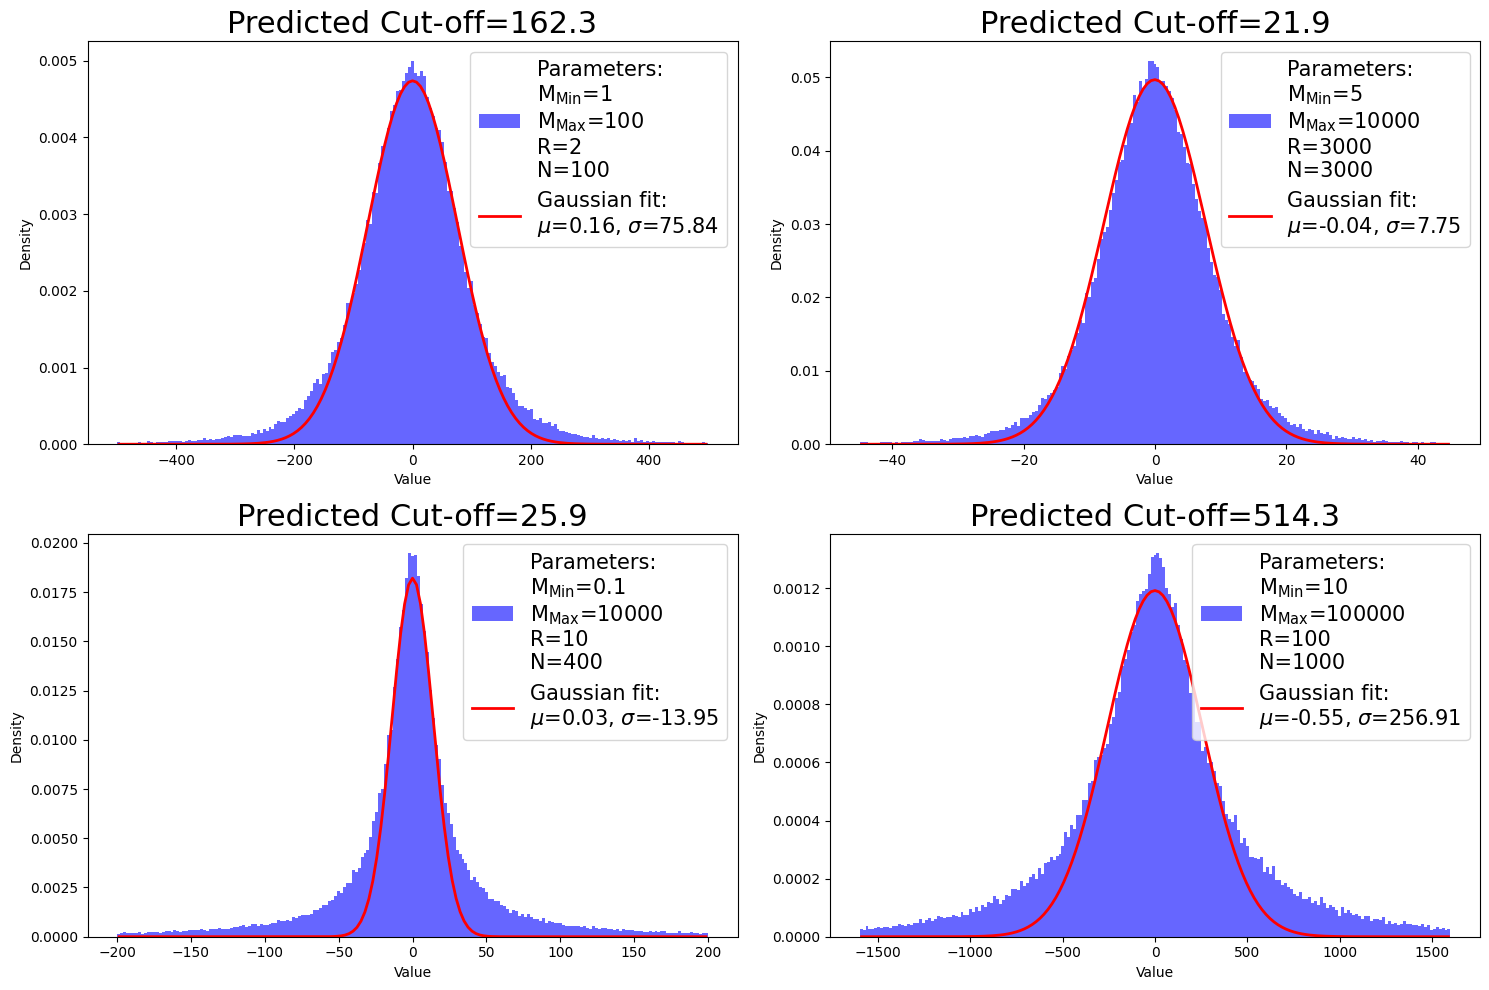

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto
from scipy.optimize import curve_fit
from tqdm import tqdm

beta = 1.9

def generate_impact_parameter(R, n, size):
    u = np.random.uniform(0, 1, size)
    b = R * (u)**(1/n)
    return b

def generate_samples(N, M_min, M_max, R):
    ms = []
    while len(ms) < N:
        m = M_min **(beta-1) * pareto.rvs(beta-1, size=N-len(ms))
        m = m[m < M_max]
        ms.extend(m[M_min**(beta-1) <= m])
    ms = np.array(ms[:N])
    bs = generate_impact_parameter(R, 2, size=N) 
    angles = np.cos(np.random.uniform(0, 2 * np.pi, size=N))
    results = np.sum((angles) * ms * (1/bs))
    return results

def compute_distribution(N, M_min, M_max, R, iterations):
    results = np.zeros(iterations)
    for i in tqdm(range(iterations), desc="Computing Samples"):
        results[i] = generate_samples(N, M_min, M_max, R)
    return results

# Parameters for different plots
params_list = [
    {"M_min": 1, "M_max": int(1e2), "R": 2, "N": 100, "x_range": 500, "cut": 162.2565292},
    {"M_min": 5, "M_max": int(1e4), "R": 3000, "N": 3000, "x_range": 45, "cut":  21.89299519},
    {"M_min": 0.1, "M_max": int(1e4), "R": 10, "N": 400, "x_range": 200, "cut": 25.89954707},
    {"M_min": 10, "M_max": int(1e5), "R": 100, "N": 1000, "x_range": 1600, "cut": 514.3185373},
]

iterations = 100000

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, params in enumerate(params_list):
    res = compute_distribution(params["N"], params["M_min"], params["M_max"], params["R"], iterations)
    
    count, sec = np.histogram(res, bins=np.linspace(-params["x_range"], params["x_range"], 150), density=True)
    mid = np.array([(sec[i+1] + sec[i])/2 for i in range(len(sec)-1)])
    
    mask = np.abs(mid) < params["cut"]
    fraction = np.sum(count[mask]) / np.sum(count)
    
    def gaussian(x, m, s):
        return (fraction / np.sqrt(s**2 * 2 * np.pi)) * np.exp(-(x - m)**2 / (2 * s**2))
    
    params_fit, covariance_fit = curve_fit(gaussian, mid[mask], count[mask], p0=[0, 100])
    
    var1 = r'${\mathrm{M}_\mathrm{Min}}$'
    var2 = r'${\mathrm{M}_\mathrm{Max}}$'
  
    ax = axs[i//2, i%2]
    ax.hist(res, bins=np.linspace(-params["x_range"], params["x_range"], 200), density=True,alpha=0.6, color='b',label = f'Parameters:\n{var1}={params["M_min"]} \n{var2}={params["M_max"]}\nR={params["R"]} \nN={params["N"]}')
    hist1, = ax.plot(mid, gaussian(mid, *params_fit), 'r', linewidth=2, label=f'Gaussian fit:\n$\\mu$={params_fit[0]:.2f}, $\\sigma$={params_fit[1]:.2f}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend(fontsize=15, title_fontsize=18)
    ax.set_title(f'Predicted Cut-off={params["cut"]:.1f}',fontsize=22)

plt.tight_layout()
plt.show()

In [86]:
print((4/3)*1.76*100*(100)**(1/10)*1**(9/10)/2)
print(1.76*3000*(10000)**(1/10)*5**(9/10)/3000)
print(1.76*400*(10000)**(1/10)*0.1**(9/10)/10)
print(1.76*1000*(100000)**(1/10)*10**(9/10)/100)



185.96080124877065
18.818528959844908
22.262434727585394
442.0920119456862


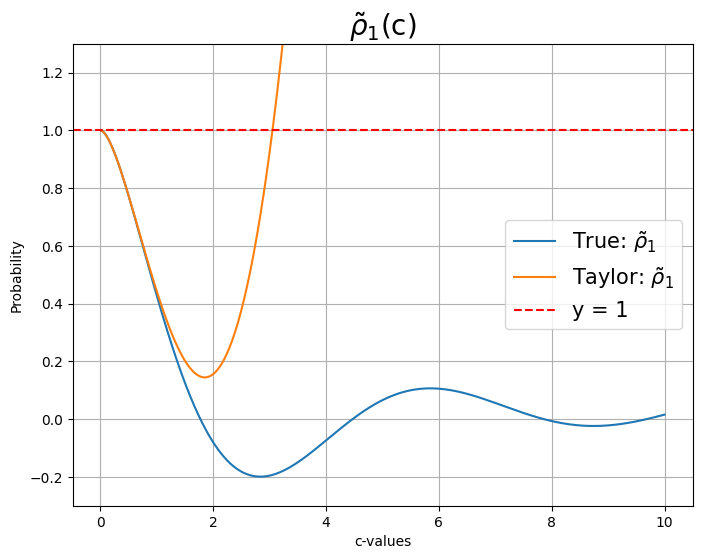

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial

# Define the first function with the infinite sum
def func1(a):
    sum_terms = np.sum([((-1)**i * (a/2)**(2*i)) / (2*i * (factorial(i+1))**2) for i in range(1, 51)], axis=0)
    return 1 + (a**2 / 2) * sum_terms - (a**2 * np.log(3.05 / a)) / 2

# Define the second function
def func2(a):
    return 1 - (a**2 * np.log(3.05 / a)) / 2

# Define the range for 'a'
a = np.linspace(0.01, 10, 400)  # Start from 0.01 to avoid log(0)

# Compute the values of the functions
y1 = func1(a)
y2 = func2(a)

# Plot the functions
plt.figure(figsize=(8, 6))
plt.plot(a, y1, label=r'True: $\tilde{\rho}_1$')
plt.plot(a, y2, label=r'Taylor: $\tilde{\rho}_1$')
plt.ylim(-0.3,1.3)

# Add the dashed line for y = 1
plt.axhline(y=1, color='r', linestyle='--', label='y = 1')

# Add labels and legend
plt.xlabel('c-values')
plt.ylabel('Probability')
plt.title(r'$\tilde{\rho}_1$(c)',fontsize=20)
plt.legend(fontsize=15)
plt.grid(True)

# Show the plot
plt.show()

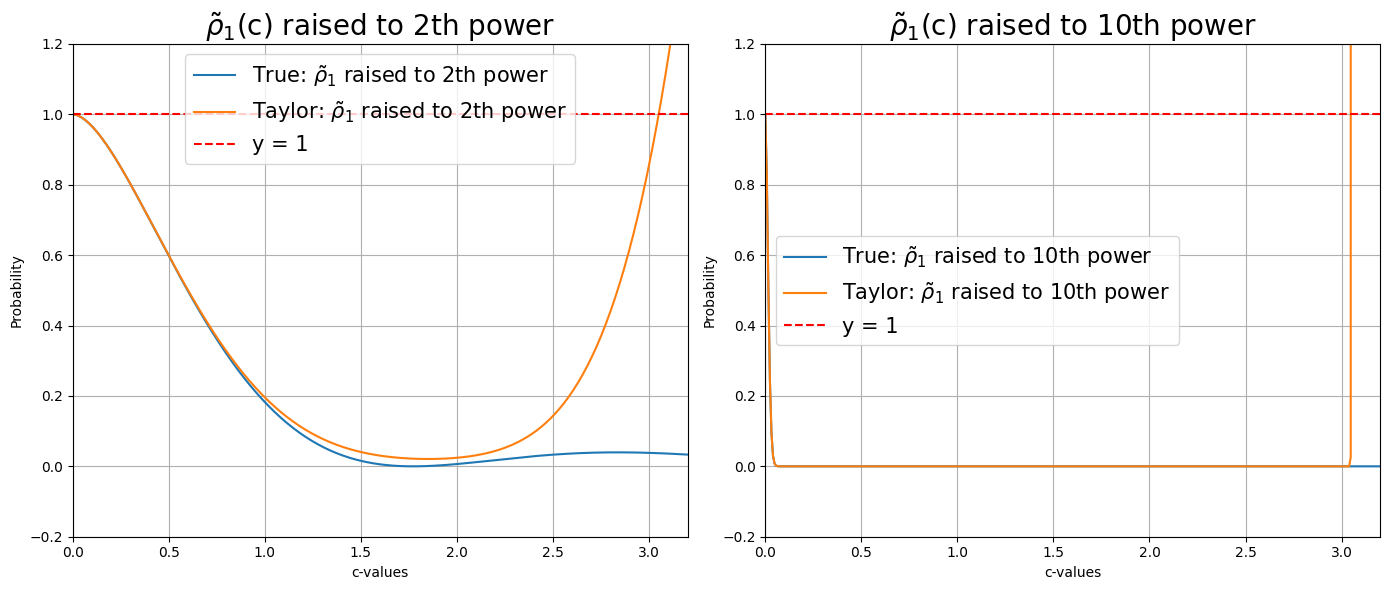

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial

# Define the first function with the infinite sum
def func1(a):
    sum_terms = np.sum([((-1)**i * (a/2)**(2*i)) / (2*i * (factorial(i+1))**2) for i in range(1, 51)], axis=0)
    return 1 + (a**2 / 2) * sum_terms - (a**2 * np.log(3.05 / a)) / 2

# Define the second function
def func2(a):
    return 1 - (a**2 * np.log(3.05 / a)) / 2

# Define the range for 'a'
a = np.linspace(0.0001, 3.2, 400)  # Start from 0.01 to avoid log(0)

# Compute the values of the functions
y1 = func1(a)
y2 = func2(a)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first function raised to the 10th power
ax1.plot(a, y1**2, label=r'True: $\tilde{\rho}_1$ raised to 2th power')
ax1.plot(a, y2**2, label=r'Taylor: $\tilde{\rho}_1$ raised to 2th power')

# Add the dashed line for y = 1
ax1.axhline(y=1, color='r', linestyle='--', label='y = 1')

# Set labels, title, limits, and legend
ax1.set_xlabel('c-values')
ax1.set_ylabel('Probability')
ax1.set_title(r'$\tilde{\rho}_1$(c) raised to 2th power', fontsize=20)
ax1.set_ylim([-0.2, 1.2])
ax1.set_xlim([0, 3.2])
ax1.legend(fontsize=15)
ax1.grid(True)

# Plot the second function raised to the 100th power
ax2.plot(a, y1**1000, label=r'True: $\tilde{\rho}_1$ raised to 10th power')
ax2.plot(a, y2**1000, label=r'Taylor: $\tilde{\rho}_1$ raised to 10th power')

# Add the dashed line for y = 1
ax2.axhline(y=1, color='r', linestyle='--', label='y = 1')

# Set labels, title, limits, and legend
ax2.set_xlabel('c-values')
ax2.set_ylabel('Probability')
ax2.set_title(r'$\tilde{\rho}_1$(c) raised to 10th power', fontsize=20)
ax2.set_ylim([-0.2, 1.2])
ax2.set_xlim([0, 3.2])
ax2.legend(fontsize=15)
ax2.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

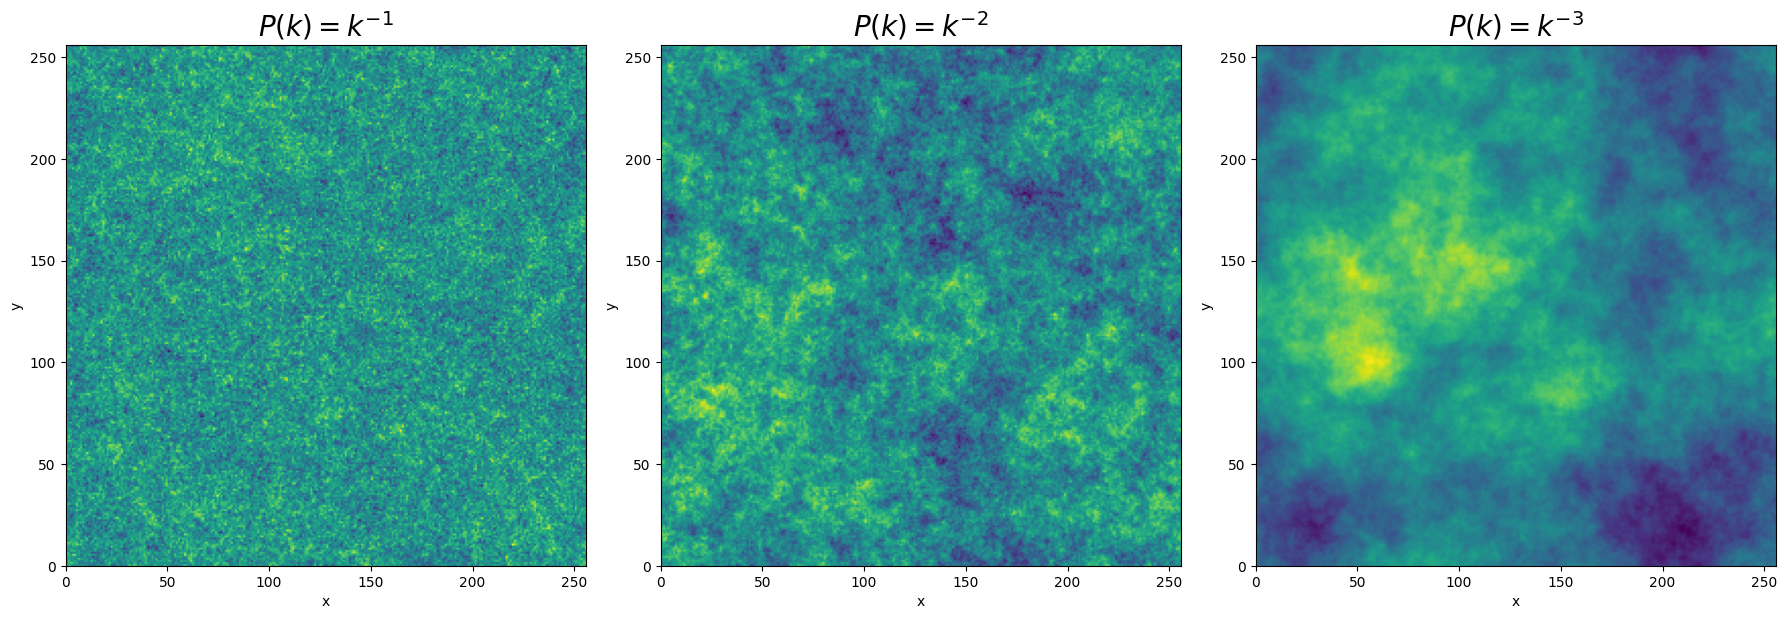

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def generate_power_spectrum_grid(size, power_spectrum_func):
    """
    Generates a 2D grid based on a given power spectrum function.
    
    Parameters:
        size (int): The size of the grid (size x size).
        power_spectrum_func (function): A function that takes a wavenumber and returns the power.
        
    Returns:
        np.ndarray: A 2D grid with the specified power spectrum.
    """
    # Generate the grid of wavenumbers
    kx = np.fft.fftfreq(size)
    ky = np.fft.fftfreq(size)
    kx, ky = np.meshgrid(kx, ky)
    
    # Calculate the wavenumber magnitude
    k = np.sqrt(kx**2 + ky**2)
    
    # Apply the power spectrum function
    power_spectrum = power_spectrum_func(k)
    
    # Generate a random complex field with the specified power spectrum
    random_phase = np.exp(2j * np.pi * np.random.rand(size, size))
    field = np.sqrt(power_spectrum) * random_phase
    
    # Perform the inverse FFT to get the real space field
    real_field = np.fft.ifft2(field).real
    
    return real_field

def power_spectrum1(k):
    """Power spectrum: P(k) = k^(-1)"""
    with np.errstate(divide='ignore', invalid='ignore'):
        p = k**(-1)
        p[0, 0] = 0  # avoid division by zero at the zero frequency
    return p

def power_spectrum2(k):
    """Power spectrum: P(k) = k^(-2)"""
    with np.errstate(divide='ignore', invalid='ignore'):
        p = k**(-2)
        p[0, 0] = 0  # avoid division by zero at the zero frequency
    return p

def power_spectrum3(k):
    """Power spectrum: P(k) = k^(-3)"""
    with np.errstate(divide='ignore', invalid='ignore'):
        p = k**(-3)
        p[0, 0] = 0  # avoid division by zero at the zero frequency
    return p

# Parameters
grid_size = 256

# Generate the grids for the different power spectra
grid1 = generate_power_spectrum_grid(grid_size, power_spectrum1)
grid2 = generate_power_spectrum_grid(grid_size, power_spectrum2)
grid3 = generate_power_spectrum_grid(grid_size, power_spectrum3)

# Plot the resulting fields
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot k^(-1)
axes[0].imshow(grid1, cmap='viridis', extent=(0, grid_size, 0, grid_size))
axes[0].set_title('$P(k) = k^{-1}$',fontsize=20)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

# Plot k^(-2)
axes[1].imshow(grid2, cmap='viridis', extent=(0, grid_size, 0, grid_size))
axes[1].set_title('$P(k) = k^{-2}$',fontsize=20)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')

# Plot k^(-3)
axes[2].imshow(grid3, cmap='viridis', extent=(0, grid_size, 0, grid_size))
axes[2].set_title('$P(k) = k^{-3}$',fontsize=20)
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')

plt.tight_layout()
plt.show()
